In [1]:
import glob
import os
import cv2
import sys
sys.path.append('../../code/')
import util.util as util
import numpy as np
import matplotlib
from tqdm import tqdm
from PIL import Image
import shutil
import re
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import h5py

In [2]:
def get_mask(rawFile, bounds_saved):
    mhdFile =rawFile.replace('.raw','.mhd') #path + 'projection_DM1.mhd'

    data = util.read_mhd(mhdFile)
    pixel_array = np.fromfile(rawFile,dtype="float32").reshape(data['NDims'], 
                                                                    data['DimSize'][1], 
                                                                    data['DimSize'][0])
    mask_proj = pixel_array[0]
    if len(bounds_saved) != 0:
        mask_proj_resized = np.array(mask_proj[bounds_saved[0], bounds_saved[1]])
    else:
        mask_proj_resized = mask_proj
    X = np.std(mask_proj_resized) * 2
    TH = np.mean(mask_proj_resized)
    mask_proj_resized[mask_proj_resized < TH - X] = 0
    mask_proj_resized[mask_proj_resized > TH + X] = X+TH
    mask_proj_resized_binary = mask_proj_resized>42
    return mask_proj_resized_binary,mask_proj_resized

def get_dm_image(rawFile, bounds_saved):
    mhdFile =rawFile.replace('.raw','.mhd') #path + 'projection_DM1.mhd'

    data = util.read_mhd(mhdFile)
    pixel_array = np.fromfile(rawFile,dtype="float32").reshape(data['NDims'], 
                                                                    data['DimSize'][1], 
                                                                    data['DimSize'][0])

    tmp = pixel_array[0]
    if len(bounds_saved) != 0:
        tmp_resized = np.array(tmp[bounds_saved[0], bounds_saved[1]])
    else:
        tmp_resized = tmp
    X = np.std(tmp_resized) * 2
    TH = np.mean(tmp_resized)
    tmp_resized[tmp_resized < TH - X] = 0
    tmp_resized[tmp_resized > TH + X] = X+TH
    return tmp_resized


(-0.5, 1573.5, 1198.5, -0.5)

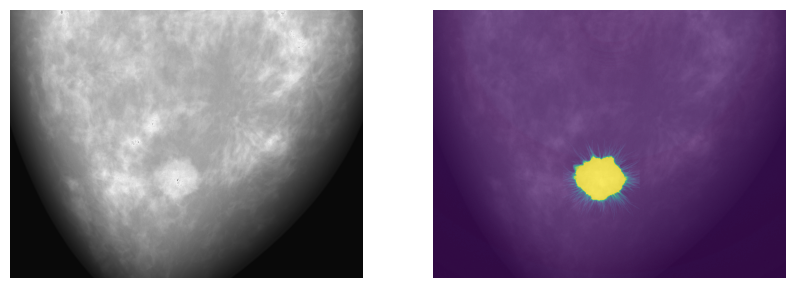

In [4]:
fig, ax = plt.subplots(1,2,figsize=(10,20))

example = '../example_data/projection_DM101.raw'
mask_gt = '../example_data/seg/projection_DM101.raw'
loc = '../example_data/projection_DM101.loc'

file = open(loc,'r')
lines = file.readlines()
file.close()
coords = [int(v) for v in lines[0].strip().split(' ')[0:2]]

bounds_saved = np.load('../example_data/bounds_fatty.npy',allow_pickle=True)

image = get_dm_image(example, bounds_saved)
image_uint8 = np.stack((image,)*3, axis=-1).astype('uint8')
mask_proj_resized_binary = get_mask(mask_gt, bounds_saved)
input_label = np.array([1])
ax[0].imshow(image_uint8, cmap="gray")
ax[0].axis('off')

ax[1].imshow(image,cmap='gray')
ax[1].imshow(mask_proj_resized_binary[1], alpha=0.7)
ax[1].axis('off')